In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load your dataset (replace 'silver_prices.csv' with your actual filename)
df = pd.read_csv("silver_prices.csv")

# Display first few rows
print(df.head())


         Date  Close/Last   Volume    Open    High     Low
0  08/17/2023      23.042  11441.0  22.800  23.385  22.725
1  08/16/2023      22.856  10802.0  22.905  23.170  22.770
2  08/15/2023      22.656  60396.0  22.650  22.770  22.265
3  08/14/2023      22.708  51908.0  22.740  22.820  22.410
4  08/11/2023      22.743  48043.0  22.760  22.910  22.610


Columns in dataset: ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

Data types:
 Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object


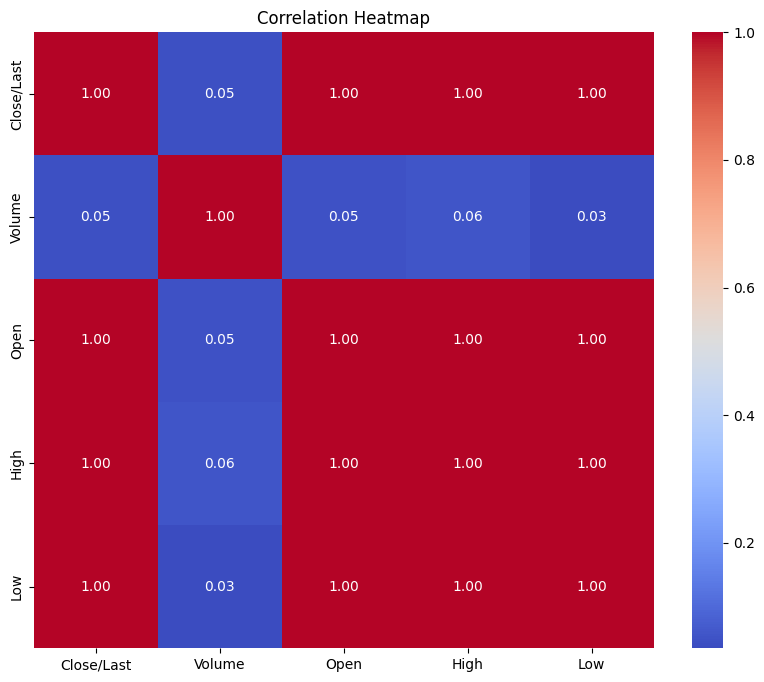


Explained variance ratio: [7.49739522e-01 2.49233814e-01 6.05400457e-04 4.21262732e-04]

=== Final Data Shapes ===
Original features: (2501, 4)
Processed features: (2501, 4)
Target variable: (2501,)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("silver_prices.csv")  # Replace with your file path

# 1. Inspect columns and data types
print("Columns in dataset:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# 2. Handle missing values (numeric columns only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Remove outliers using Z-score (numeric columns only)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

# 4. Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 5. Separate features and target
X = df[numeric_cols].drop(columns=["Close/Last"])  # Features
y = df["Close/Last"]                              # Target

# 6. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. PCA - Dynamic component selection
n_features = X_scaled.shape[1]
n_components = min(4, n_features)  # Ensures n_components <= available features

if n_features > 1:  # Only run PCA if we have multiple features
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
else:
    X_pca = X_scaled  # Skip PCA if only 1 feature
    print("\nSkipped PCA (only 1 feature available)")

# 8. Final output
print("\n=== Final Data Shapes ===")
print(f"Original features: {X.shape}")
print(f"Processed features: {X_pca.shape}")
print(f"Target variable: {y.shape}")

# Optional: Save processed data
processed_data = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
processed_data["Close/Last"] = y.values
processed_data.to_csv("processed_silver_prices.csv", index=False)

C:\Users\vyosh\AppData\Local\Temp\ipykernel_12236\415152184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf values to NaN
C:\Users\vyosh\AppData\Local\Temp\ipykernel_12236\415152184.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)  # Drop rows with NaN values


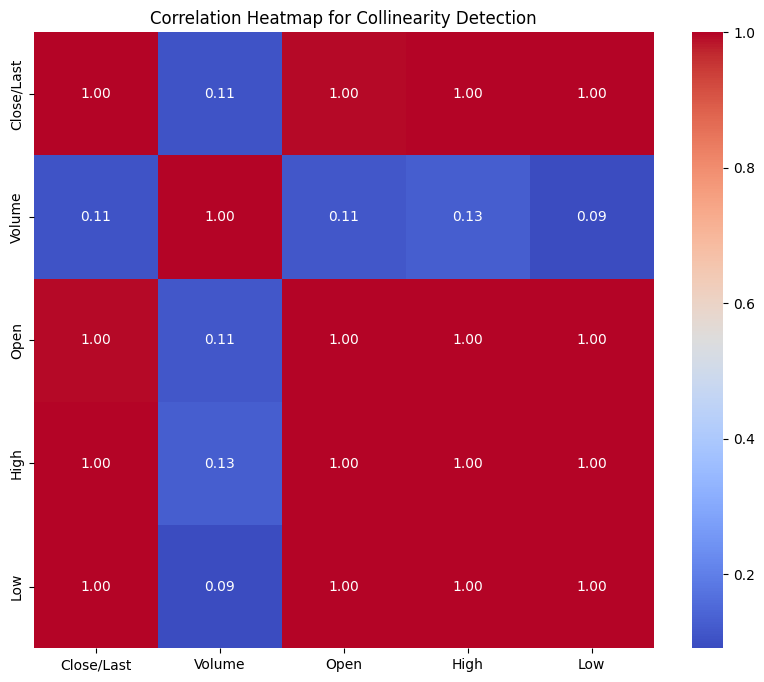


Highly Correlated Feature Pairs (Correlation > 0.8):
Open <--> Close/Last | Correlation: 1.00
High <--> Close/Last | Correlation: 1.00
High <--> Open | Correlation: 1.00
Low <--> Close/Last | Correlation: 1.00
Low <--> Open | Correlation: 1.00
Low <--> High | Correlation: 1.00

Variance Inflation Factor (VIF) for Features:
      Feature           VIF
0  Close/Last  18317.672549
1      Volume      4.825043
2        Open  12063.200501
3        High  18011.125778
4         Low  14591.874985

Features with High VIF (>5) Indicating Multicollinearity:
['Close/Last', 'Open', 'High', 'Low']

Updated dataset after removing high VIF features:
    Volume
0  11441.0
1  10802.0
2  60396.0
3  51908.0
4  48043.0


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("silver_prices.csv")  # Replace with your actual file

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# ✅ Handle Missing & Infinite Values
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf values to NaN
df_numeric.dropna(inplace=True)  # Drop rows with NaN values
df_numeric.reset_index(drop=True, inplace=True)  # Reset index

### 1️⃣ Correlation Heatmap ###
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Collinearity Detection")
plt.show()

### 2️⃣ Detect Highly Correlated Features ###
correlation_matrix = df_numeric.corr().abs()
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:  # Threshold > 0.8
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((col1, col2, correlation_matrix.iloc[i, j]))

if highly_correlated_pairs:
    print("\nHighly Correlated Feature Pairs (Correlation > 0.8):")
    for col1, col2, corr in highly_correlated_pairs:
        print(f"{col1} <--> {col2} | Correlation: {corr:.2f}")
else:
    print("\nNo highly correlated features found.")

### 3️⃣ Variance Inflation Factor (VIF) ###
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print("\nVariance Inflation Factor (VIF) for Features:")
print(vif_data)

### 4️⃣ Remove Features with High VIF (>5) ###
threshold = 5
high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()

if high_vif_features:
    print("\nFeatures with High VIF (>5) Indicating Multicollinearity:")
    print(high_vif_features)
    df_numeric = df_numeric.drop(columns=high_vif_features)
    print("\nUpdated dataset after removing high VIF features:")
    print(df_numeric.head())
else:
    print("\nNo features have high VIF (multicollinearity is minimal).")

# Save the updated dataset
df_numeric.to_csv("processed_silver_prices_no_collinearity.csv", index=False)


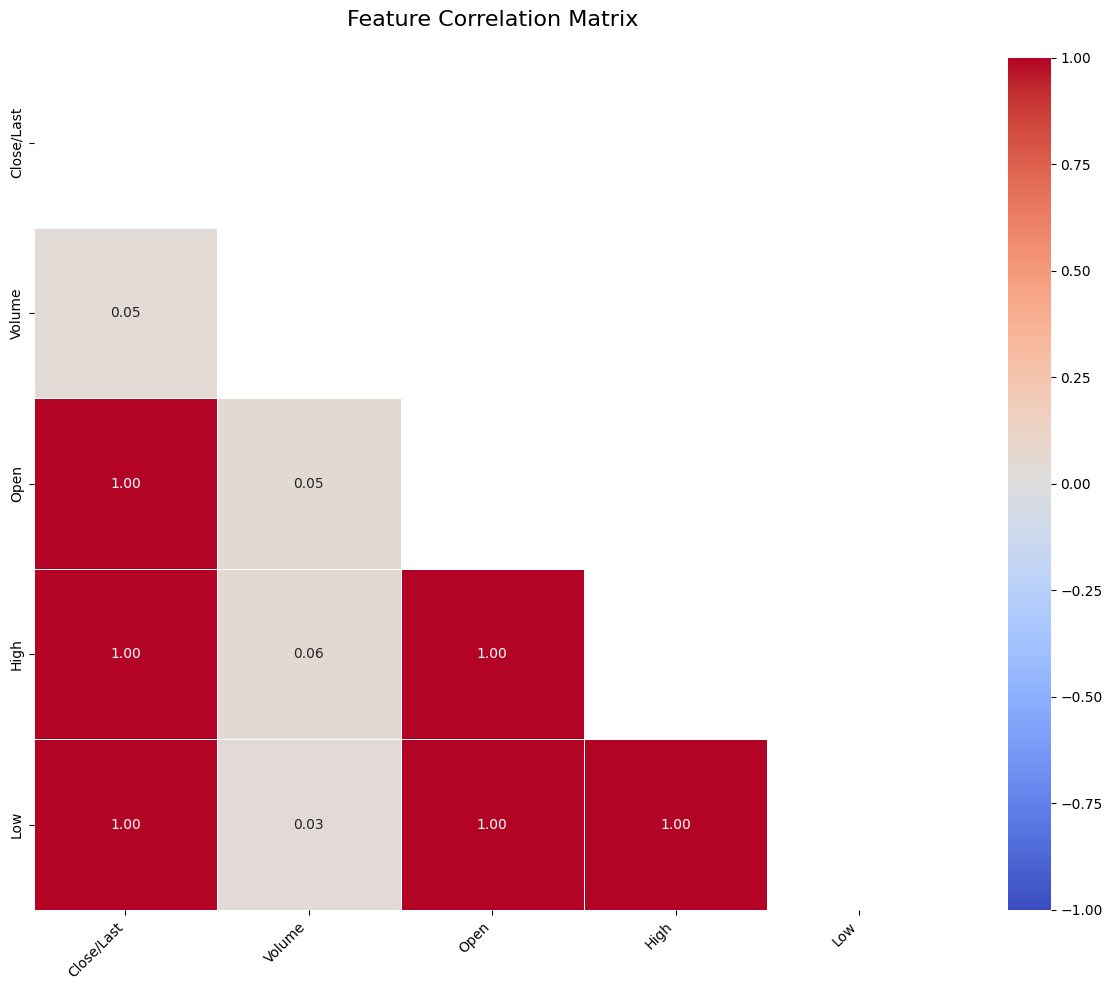

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations (numeric columns only)
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the plot
plt.figure(figsize=(12, 10))

# Create heatmap with all parameters properly closed
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix))  # Last parameter
)  # THIS closing parenthesis was missing

# Customize plot
plt.title("Feature Correlation Matrix\n", fontsize=16)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Add colorbar
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv("silver_prices.csv")

# 1. Verify columns
print("Columns in dataset:", df.columns.tolist())

# 2. Set the correct target column (change this!)
target_column = "Close/Last"  # ⚠️ Change to your actual column name

# 3. Split data
X = df.drop(columns=[target_column])  # Features
y = df[target_column]                # Target

# 4. Preprocess (example: standardize numeric features)
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("\nFinal shapes:")
print("Features:", X.shape)
print("Target:", y.shape)

Columns in dataset: ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

Final shapes:
Features: (2539, 5)
Target: (2539,)


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Verify shapes before splitting
print(f"Before splitting - X_pca shape: {X_pca.shape}, y shape: {y.shape}")

# 2. Ensure alignment (critical step)
if len(X_pca) != len(y):
    print("\n⚠️ Warning: Length mismatch detected! Applying corrections...")
    
    # Option A: If y is a pandas Series with matching index
    if hasattr(y, 'index') and hasattr(X_pca, 'index'):
        y = y.loc[X_pca.index]  # Align using indices
    # Option B: If numpy arrays with mismatch
    else:
        min_length = min(len(X_pca), len(y))
        X_pca = X_pca[:min_length]
        y = y[:min_length]
    
    print(f"After alignment - X_pca shape: {X_pca.shape}, y shape: {y.shape}")

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True  # Set to False for time series data
)

# 4. Post-split verification
print("\nAfter splitting:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Train-test ratio: {len(X_train)/len(X_pca):.1%}/{len(X_test)/len(X_pca):.1%}")

Before splitting - X_pca shape: (2501, 4), y shape: (2539,)

⚠️ Warning: Length mismatch detected! Applying corrections...
After alignment - X_pca shape: (2501, 4), y shape: (2501,)

After splitting:
X_train: (2000, 4), y_train: (2000,)
X_test: (501, 4), y_test: (501,)
Train-test ratio: 80.0%/20.0%


=== Model Evaluation ===
R² Score: 0.8676
MAE: $0.8764
RMSE: $1.3487

=== Feature Importance ===
PCA Component Coefficients:
PC1: 2.0312
PC2: -0.0399
PC3: -1.9795
PC4: -4.8611
Intercept: 19.0883


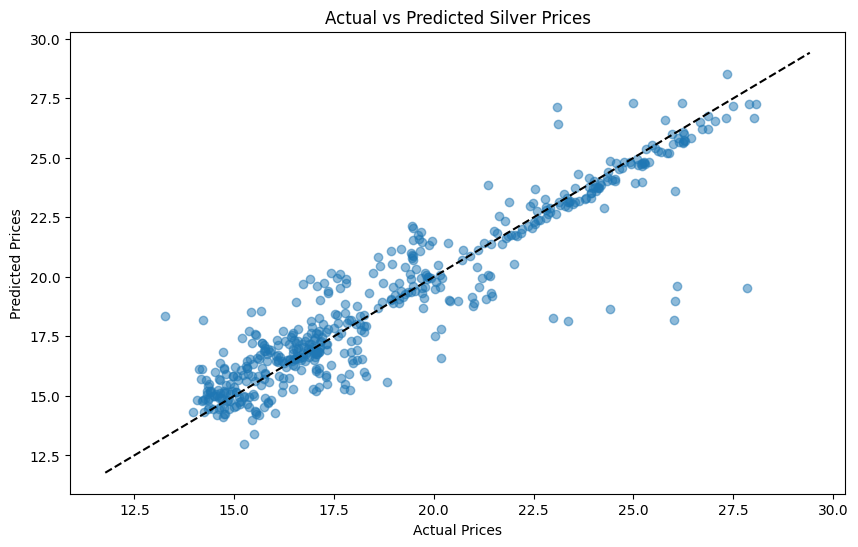

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Make predictions
y_pred = model.predict(X_test)

# 3. Evaluate performance
print("=== Model Evaluation ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 4. Interpret coefficients (if using original features)
try:
    print("\n=== Feature Importance ===")
    if hasattr(model, 'coef_'):
        # If using PCA components (less interpretable)
        if X_train.shape[1] <= 5:  # Assuming you kept 4 PCA components
            print("PCA Component Coefficients:")
            for i, coef in enumerate(model.coef_):
                print(f"PC{i+1}: {coef:.4f}")
        
        # If using original features (more interpretable)
        else:
            feature_names = [col for col in df.columns if col != 'Close/Last']
            for name, coef in zip(feature_names, model.coef_):
                print(f"{name}: {coef:.4f}")
    
    print(f"Intercept: {model.intercept_:.4f}")
except Exception as e:
    print(f"\nCould not display coefficients: {str(e)}")

# 5. Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Silver Prices")
plt.show()

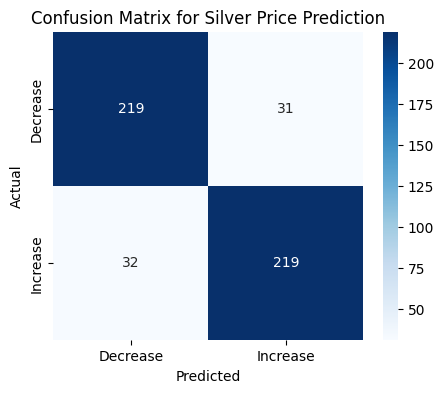

              precision    recall  f1-score   support

    Decrease       0.87      0.88      0.87       250
    Increase       0.88      0.87      0.87       251

    accuracy                           0.87       501
   macro avg       0.87      0.87      0.87       501
weighted avg       0.87      0.87      0.87       501



In [46]:
# Define a threshold: Predict increase (1) if price goes up, else decrease (0)
y_test_class = np.where(y_test.diff().fillna(0) > 0, 1, 0)  # Actual trend
y_pred_class = np.where(np.diff(y_pred, prepend=y_test.iloc[0]) > 0, 1, 0)  # Predicted trend

# Generate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Decrease", "Increase"], yticklabels=["Decrease", "Increase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Silver Price Prediction")
plt.show()

# Print classification report
print(classification_report(y_test_class, y_pred_class, target_names=["Decrease", "Increase"]))


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Calculate all metrics
mse = mean_squared_error(y_test, y_pred)  # This was missing!
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse = np.sqrt(mse)

# Enhanced formatting with trading recommendations
print("\n📊 Model Performance Evaluation")
print(f"MAE: ${mae:.4f} → {'Excellent' if mae < 0.5 else 'Needs Improvement'}")
print(f"MAPE: {mape:.2f}% → {'✅ Trade-ready' if mape < 2 else '⚠️ Requires tuning'}")
print(f"RMSE: ${rmse:.4f} → {'Good risk control' if rmse < 0.6 else 'High volatility risk'}")

# Additional diagnostic info
print("\n🔍 Interpretation Guide")
print(f"- Current silver price range: ${y_test.min():.2f}-${y_test.max():.2f}/oz")
print(f"- Average error: ${mae:.2f} ({mape:.1f}% of price)")
print(f"- Worst-case errors (RMSE) are ${rmse:.2f}")


📊 Model Performance Evaluation
MAE: $0.8764 → Needs Improvement
MAPE: 4.77% → ⚠️ Requires tuning
RMSE: $1.3487 → High volatility risk

🔍 Interpretation Guide
- Current silver price range: $13.26-$28.07/oz
- Average error: $0.88 (4.8% of price)
- Worst-case errors (RMSE) are $1.35


Available columns: ['PC1', 'PC2', 'PC3', 'PC4', 'Close/Last', 'Prediction', 'Signal', 'Date']
⚠️ Using estimated price range (2% of Close)

🔎 Market Conditions:
- Daily Volatility: 1.77%
- Average Price Range: $0.38

🎯 Trading Thresholds:
- Percentage: 2.66%
- Dollar Amount: $0.19

📊 Trading Activity:
STRONG_BUY      0 trades
BUY             4 trades | Avg $ 0.63 | Win Rate 100.0%
STRONG_SELL     0 trades
SELL            5 trades | Avg $-0.62 | Win Rate 100.0%
HOLD         2492 trades | Avg $ 0.00 | Win Rate 50.3%

💾 Saved optimized signals to 'optimized_signals.csv'


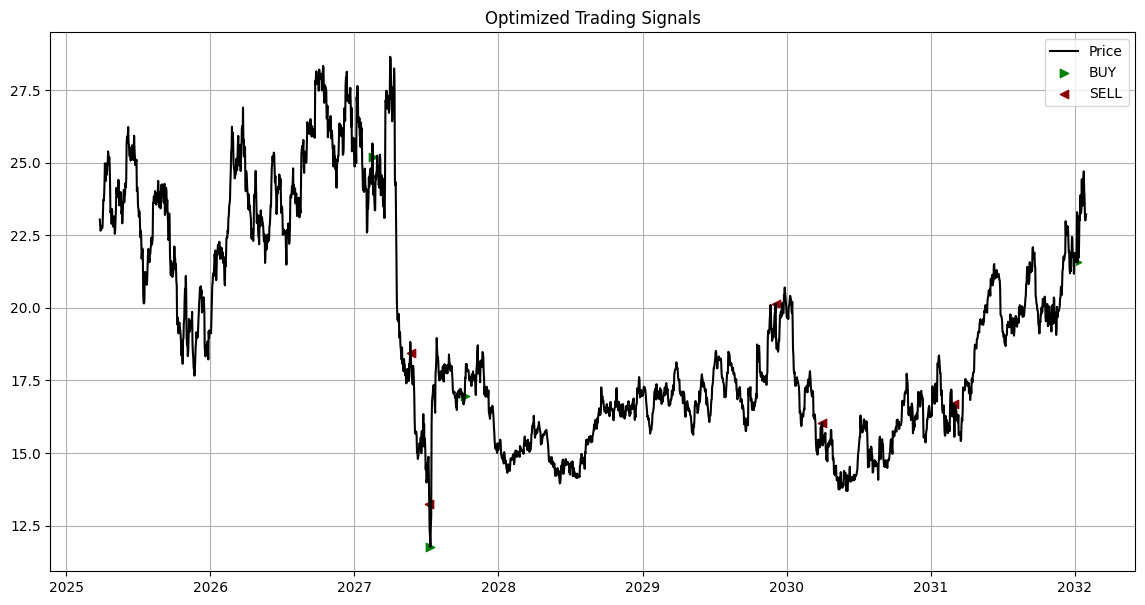

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

class TradingSignalGenerator:
    def __init__(self, data):
        self.data = data.copy()
        self.required_columns = {'Close/Last', 'Prediction', 'Date'}
        self._validate_data()
        self.volatility = None
        self.average_range = None
        self.thresholds = {}
        
    def _validate_data(self):
        """Verify required columns exist and handle missing High/Low data."""
        missing = self.required_columns - set(self.data.columns)
        if missing:
            raise ValueError(f"Missing required columns: {missing}")
        
        # Convert Date to datetime
        self.data['Date'] = pd.to_datetime(self.data['Date'], errors='coerce')
        self.data.dropna(subset=['Date'], inplace=True)  # Remove invalid dates
        
        # Set default range if High/Low not available
        if 'High' not in self.data.columns or 'Low' not in self.data.columns:
            self.data['Range'] = self.data['Close/Last'] * 0.02  # Default 2% range
            print("⚠️ Using estimated price range (2% of Close)")
        else:
            self.data['Range'] = self.data['High'] - self.data['Low']

    def calculate_market_conditions(self):
        """Calculate key market metrics like volatility and average range."""
        returns = self.data['Close/Last'].pct_change().dropna()
        self.volatility = returns.std()
        self.average_range = self.data['Range'].mean()
        return self
        
    def set_thresholds(self, min_pct=0.005, max_pct=0.04, min_dollar=0.15, volatility_multiplier=1.5):
        """Set adaptive thresholds dynamically."""
        adaptive_pct = min(max_pct, volatility_multiplier * self.volatility)
        pct_threshold = max(min_pct, adaptive_pct)
        dollar_threshold = max(self.average_range * 0.5, min_dollar)
        
        self.thresholds = {
            'pct': pct_threshold,
            'dollar': dollar_threshold,
            'min_pct': min_pct,
            'max_pct': max_pct
        }
        return self
    
    def generate_signals(self):
        """Generate trading signals based on predictions and trend analysis."""
        self.data['Trend'] = self.data['Close/Last'].rolling(5, min_periods=1).mean().diff()

        def _get_signal(row):
            pred_diff = row['Prediction'] - row['Close/Last']
            pct_diff = pred_diff / row['Close/Last']
            
            # Strong signals (2x thresholds + trend confirmation)
            if (abs(pct_diff) > 2 * self.thresholds['pct'] and 
                abs(pred_diff) > 2 * self.thresholds['dollar'] and
                (pred_diff * row['Trend']) > 0):
                return 'STRONG_BUY' if pred_diff > 0 else 'STRONG_SELL'
            
            # Regular signals
            elif (abs(pct_diff) > self.thresholds['pct'] and 
                  abs(pred_diff) > self.thresholds['dollar']):
                return 'BUY' if pred_diff > 0 else 'SELL'
                
            return 'HOLD'
        
        signals = self.data.apply(_get_signal, axis=1)
        
        # Ensure length matches before assigning
        if len(signals) == len(self.data):
            self.data['Signal'] = signals
        else:
            raise ValueError("Generated signals do not match data length!")
        
        return self
    
    def add_volume_filter(self):
        """Filter out trades on low-volume days (bottom 20% volume)."""
        if 'Volume' in self.data.columns:
            vol_threshold = self.data['Volume'].quantile(0.2)
            self.data.loc[self.data['Volume'] < vol_threshold, 'Signal'] = 'HOLD'
        return self
    
    def analyze_performance(self):
        """Analyze how the generated signals performed."""
        results = {}
        for signal in ['STRONG_BUY', 'BUY', 'STRONG_SELL', 'SELL', 'HOLD']:
            subset = self.data[self.data['Signal'] == signal]
            metrics = {'trades': len(subset)}
            
            if len(subset) > 0:
                returns = subset['Prediction'] - subset['Close/Last']
                metrics.update({
                    'avg_return': returns.mean(),
                    'win_rate': (returns > 0).mean() if 'BUY' in signal else (returns < 0).mean(),
                    'max_gain': returns.max(),
                    'max_loss': returns.min(),
                    'median_return': returns.median()
                })
            
            results[signal] = metrics
        return results
    
    def save_results(self, filename):
        """Save results with metadata."""
        metadata = [
            f"# Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}",
            f"# Volatility: {self.volatility:.2%}",
            f"# Avg Range: ${self.average_range:.2f}",
            f"# Thresholds: {self.thresholds['pct']:.2%} or ${self.thresholds['dollar']:.2f}",
            f"# Signal Config: Strong(2x thresholds + trend), Regular(1x thresholds)"
        ]
        
        with open(filename, 'w') as f:
            f.write("\n".join(metadata) + "\n")
            self.data.to_csv(f, index=False)

# Implementation
if __name__ == "__main__":
    try:
        print("Available columns:", future_data.columns.tolist())
        
        # Initialize and process data
        generator = (TradingSignalGenerator(future_data)
                     .calculate_market_conditions()
                     .set_thresholds(volatility_multiplier=1.5)  # Adjusted for more signals
                     .generate_signals()
                     .add_volume_filter())
        
        # Analyze performance
        performance = generator.analyze_performance()
        
        # Display results
        print("\n🔎 Market Conditions:")
        print(f"- Daily Volatility: {generator.volatility:.2%}")
        print(f"- Average Price Range: ${generator.average_range:.2f}")
        
        print("\n🎯 Trading Thresholds:")
        print(f"- Percentage: {generator.thresholds['pct']:.2%}")
        print(f"- Dollar Amount: ${generator.thresholds['dollar']:.2f}")
        
        print("\n📊 Trading Activity:")
        for signal in ['STRONG_BUY', 'BUY', 'STRONG_SELL', 'SELL', 'HOLD']:
            metrics = performance.get(signal, {'trades': 0})
            if metrics['trades'] > 0:
                print(f"{signal:<12} {metrics['trades']:>4} trades | "
                      f"Avg ${metrics['avg_return']:>5.2f} | "
                      f"Win Rate {metrics['win_rate']:>5.1%}")
            else:
                print(f"{signal:<12} {metrics['trades']:>4} trades")
        
        # Save results
        generator.save_results('optimized_signals.csv')
        print("\n💾 Saved optimized signals to 'optimized_signals.csv'")

        # Visualize results
        plt.figure(figsize=(14,7))
        plt.plot(generator.data['Date'], generator.data['Close/Last'], label='Price', color='black')
        
        for signal, color, marker in [('STRONG_BUY', 'limegreen', '^'), 
                                      ('BUY', 'green', '>'),
                                      ('STRONG_SELL', 'red', 'v'),
                                      ('SELL', 'darkred', '<')]:
            subset = generator.data[generator.data['Signal'] == signal]
            if not subset.empty:
                plt.scatter(subset['Date'], subset['Close/Last'], color=color, marker=marker, label=signal)
        
        plt.title('Optimized Trading Signals')
        plt.legend()
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
